In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
file_path = '/content/drive/MyDrive/Dengue/Dengue_Dataset_with_Weather.csv'
df = pd.read_csv(file_path)

# Clean columns
df.columns = df.columns.str.strip().str.replace(" ", "_").str.upper()
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df.dropna(subset=['DATE'], inplace=True)

# Feature engineering
df['MONTH'] = df['DATE'].dt.month
df['YEAR'] = df['DATE'].dt.year
df['DAY_OF_YEAR'] = df['DATE'].dt.dayofyear

# Fill missing weather values
weather_cols = ['MAX_TEMPERATURE', 'MIN_TEMPERATURE', 'HUMIDITY']
df[weather_cols] = df[weather_cols].fillna(method='ffill').fillna(0)

# Define risk levels
def determine_risk_level(admitted):
    if admitted > 500:
        return 'High'
    elif admitted > 200:
        return 'Severe'
    elif admitted > 50:
        return 'Moderate'
    else:
        return 'Low'
df['RISK_LEVEL'] = df['ADMITTED'].apply(determine_risk_level)

# Extract features and labels
features = ['MAX_TEMPERATURE', 'MIN_TEMPERATURE', 'HUMIDITY', 'MONTH', 'DAY_OF_YEAR', 'YEAR']
X = df[features]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['RISK_LEVEL'])

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


Mounted at /content/drive


<ipython-input-1-5a91aabf36c4>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[weather_cols] = df[weather_cols].fillna(method='ffill').fillna(0)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Evaluation function
def evaluate_model(model, name):
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"\n📊 Model: {name}")
    print(f"Accuracy:  {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall:    {recall:.2f}")
    print(f"F1 Score:  {f1:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }



📊 Model: Random Forest
Accuracy:  0.91
Precision: 0.91
Recall:    0.91
F1 Score:  0.91

Classification Report:
              precision    recall  f1-score   support

        High       0.91      0.95      0.93        61
         Low       0.96      0.99      0.97       134
    Moderate       0.85      0.74      0.79        39
      Severe       0.78      0.74      0.76        34

    accuracy                           0.91       268
   macro avg       0.87      0.85      0.86       268
weighted avg       0.91      0.91      0.91       268



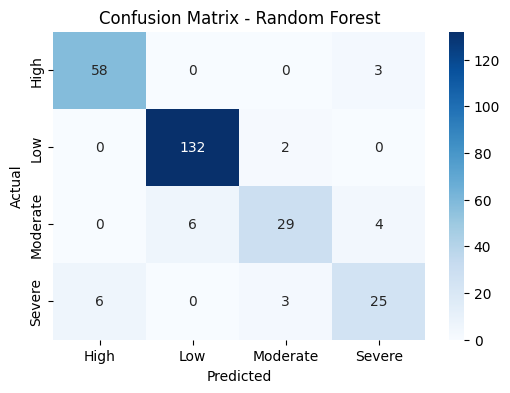


📊 Model: Decision Tree
Accuracy:  0.85
Precision: 0.85
Recall:    0.85
F1 Score:  0.85

Classification Report:
              precision    recall  f1-score   support

        High       0.88      0.85      0.87        61
         Low       0.93      0.99      0.96       134
    Moderate       0.77      0.59      0.67        39
      Severe       0.59      0.65      0.62        34

    accuracy                           0.85       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.85      0.85      0.85       268



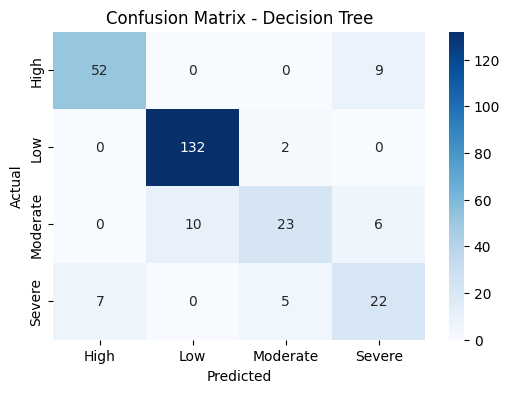

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



📊 Model: Logistic Regression
Accuracy:  0.63
Precision: 0.66
Recall:    0.63
F1 Score:  0.64

Classification Report:
              precision    recall  f1-score   support

        High       0.53      0.39      0.45        61
         Low       0.92      0.90      0.91       134
    Moderate       0.30      0.31      0.30        39
      Severe       0.23      0.35      0.28        34

    accuracy                           0.63       268
   macro avg       0.50      0.49      0.49       268
weighted avg       0.66      0.63      0.64       268



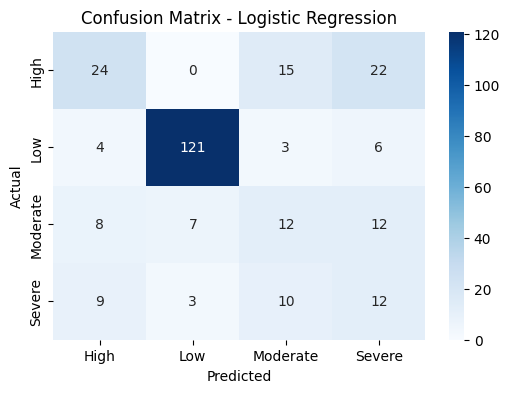


📊 Model: K-Nearest Neighbors
Accuracy:  0.68
Precision: 0.71
Recall:    0.68
F1 Score:  0.69

Classification Report:
              precision    recall  f1-score   support

        High       0.65      0.59      0.62        61
         Low       0.93      0.84      0.89       134
    Moderate       0.35      0.41      0.38        39
      Severe       0.37      0.50      0.42        34

    accuracy                           0.68       268
   macro avg       0.58      0.59      0.58       268
weighted avg       0.71      0.68      0.69       268



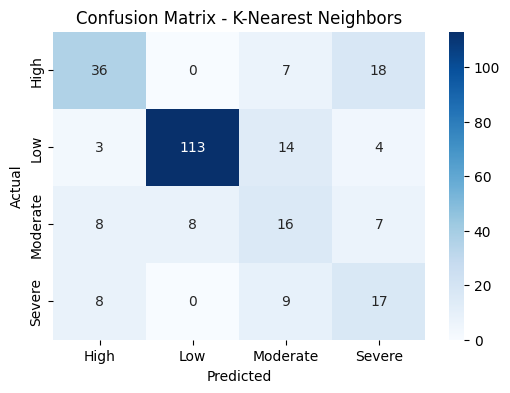


📊 Model: Support Vector Machine
Accuracy:  0.64
Precision: 0.61
Recall:    0.64
F1 Score:  0.62

Classification Report:
              precision    recall  f1-score   support

        High       0.52      0.56      0.54        61
         Low       0.93      0.90      0.91       134
    Moderate       0.00      0.00      0.00        39
      Severe       0.23      0.50      0.31        34

    accuracy                           0.64       268
   macro avg       0.42      0.49      0.44       268
weighted avg       0.61      0.64      0.62       268



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


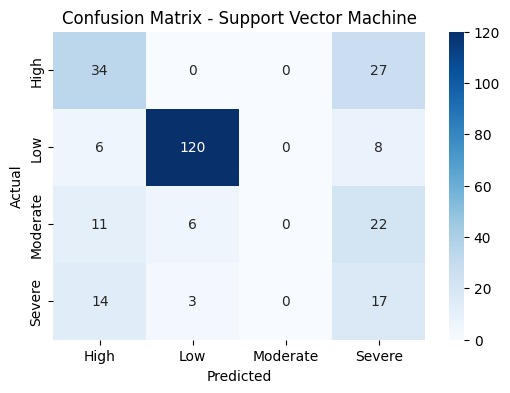

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

results = []

models = [
    (RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42), "Random Forest"),
    (DecisionTreeClassifier(random_state=42), "Decision Tree"),
    (LogisticRegression(max_iter=1000, class_weight='balanced'), "Logistic Regression"),
    (KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors"),
    (SVC(probability=True, class_weight='balanced'), "Support Vector Machine")
]

for model, name in models:
    result = evaluate_model(model, name)
    results.append(result)


In [ ]:
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
print("\n📊 Model Comparison:")
results_df



📊 Model Comparison:


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.910448,0.907770,0.910448,0.908249
1,Decision Tree,0.854478,0.852397,0.854478,0.851160
2,K-Nearest Neighbors,0.679104,0.713426,0.679104,0.693116
3,Logistic Regression,0.630597,0.656159,0.630597,0.639287
4,Support Vector Machine,0.638060,0.613320,0.638060,0.619051


In [ ]:
results_df.to_csv('/content/drive/MyDrive/Dengue/model_comparison_results.csv', index=False)


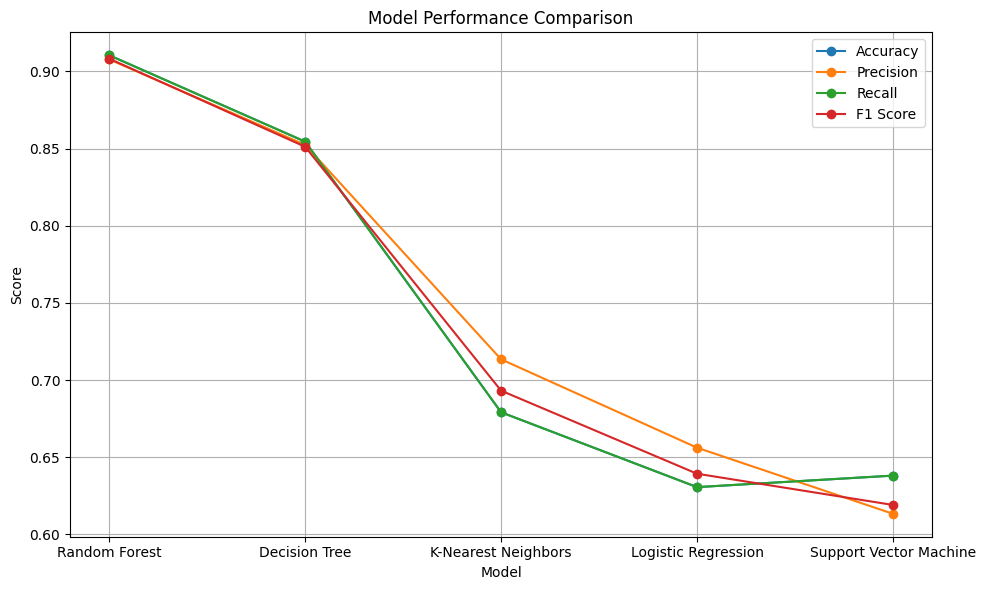

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plt.plot(results_df['Model'], results_df[metric], marker='o', label=metric)

plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
